In [ ]:
!pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: walyfaye
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:02<00:00, 104MB/s]


In [ ]:
!pip install kaggle

In [ ]:
# to upload files
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creation fichier kaggle
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json /.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download tongpython/nattawut-5920421014-cat-vs-dog-dl

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')


Lecture en images

In [ ]:
cat_files = glob('../content/cat-and-dog/training_set/training_set/cats/*.jpg')
dog_files = glob('../content/cat-and-dog/training_set/training_set/dogs/*.jpg')

In [ ]:
cat_files

['../content/cat-and-dog/training_set/training_set/cats/cat.649.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2403.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.1237.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2291.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.1919.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2023.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2061.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.933.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.3527.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2181.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.2893.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.3062.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.1408.jpg',
 '../content/cat-and-dog/training_set/training_set/cats/cat.3587.jpg',
 '../con

In [ ]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((389, 289, 3), (389, 289, 3))

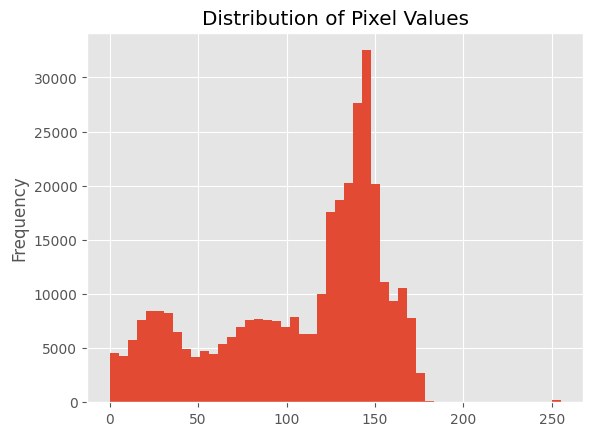

In [ ]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

#Affichage d'images

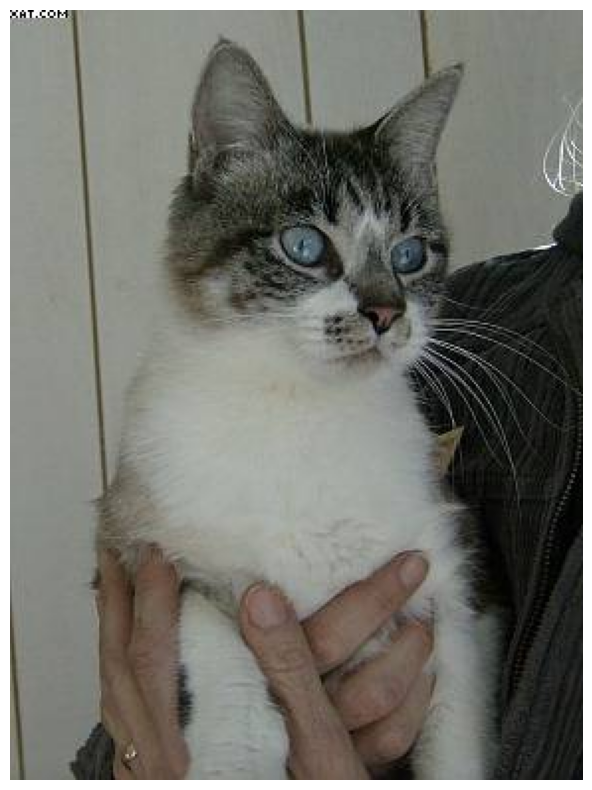

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

#Canaux d'images

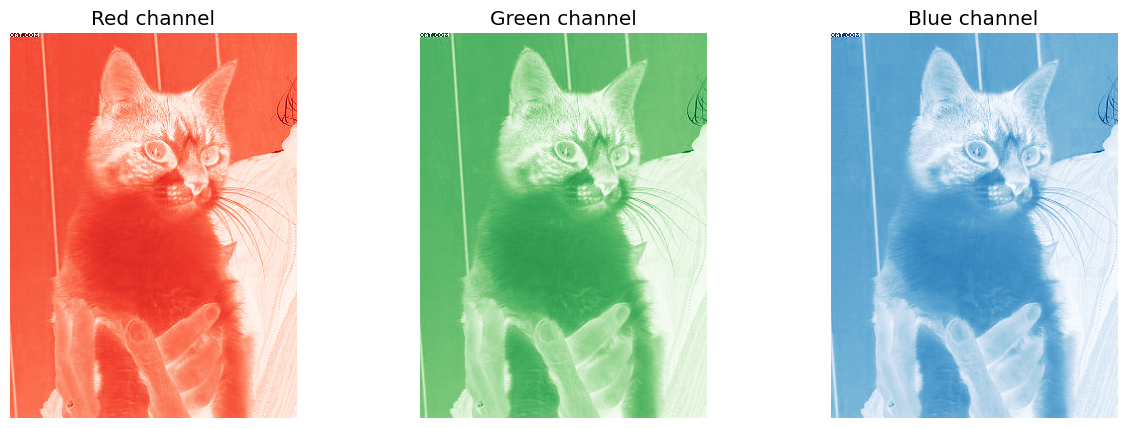

In [ ]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

#Matplotlib vs cv2 Numpy Arrays¶

cv2 lit les canaux en BGR
matplotlib lit les canaux en RVB

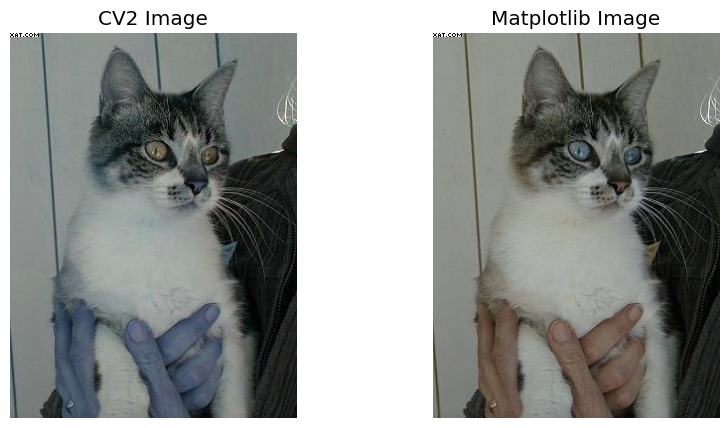

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

#Manipulation de l'image

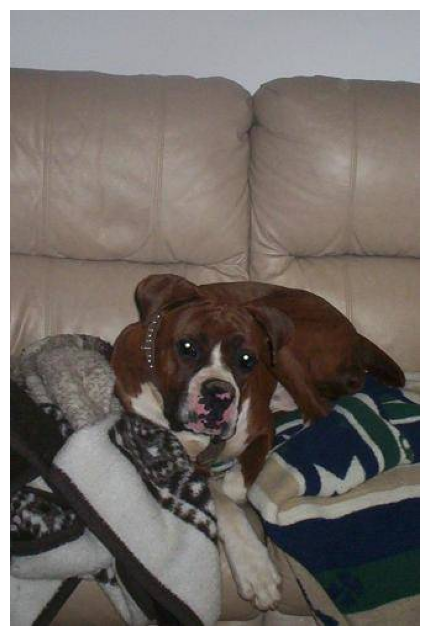

In [ ]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

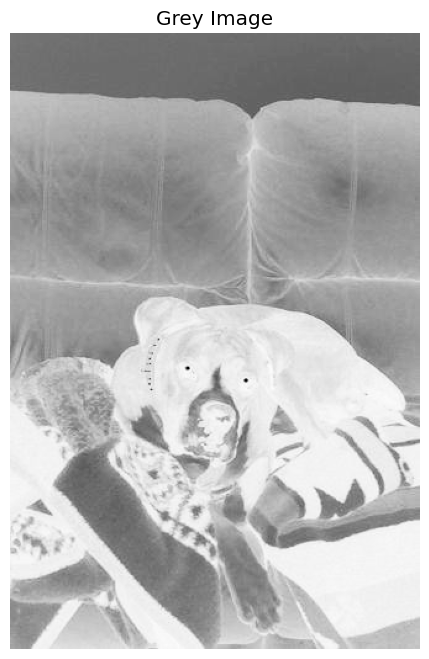

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

#Redimensionnement et mise à l'échelle

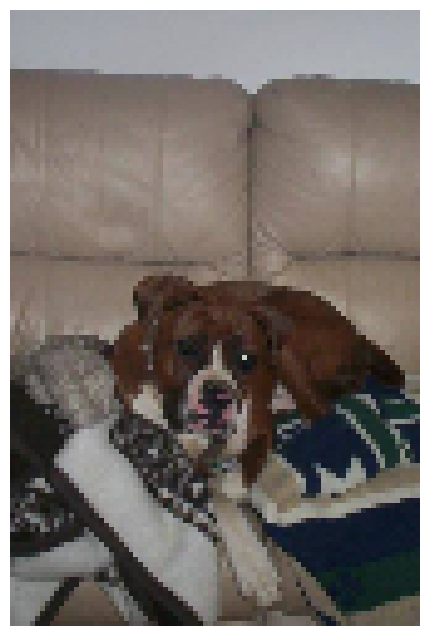

In [ ]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

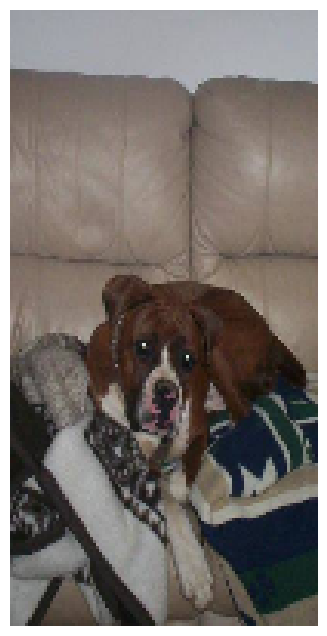

In [ ]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

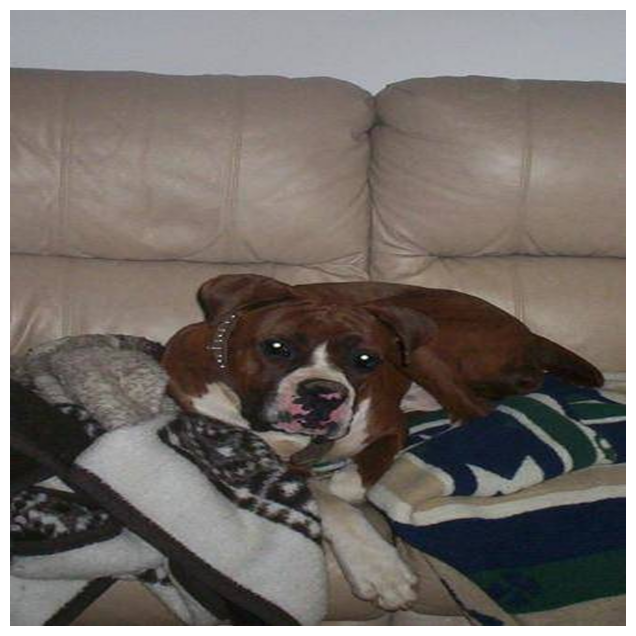

In [ ]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

#Noyau cV2

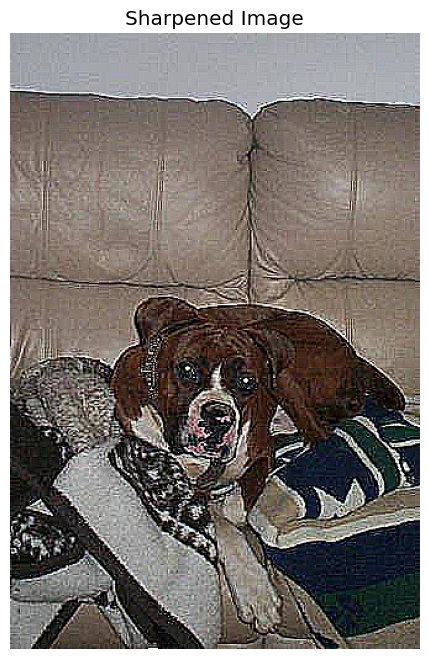

In [ ]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

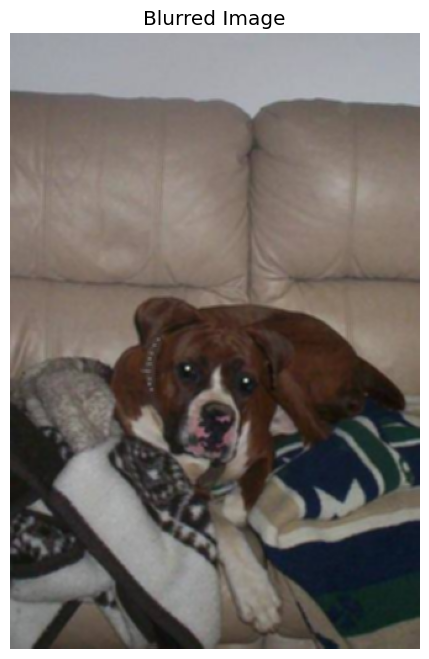

In [ ]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

#Save image

In [ ]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True